# Seaborn

## Goal: Explore additional Seaborn examples

## Discovering structure in heatmap data

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

In [5]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header = [0, 1, 2], index_col=0)

In [6]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
               .astype(int)
               .isin(used_networks))
df = df.loc[:, used_columns]

In [7]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

In [8]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

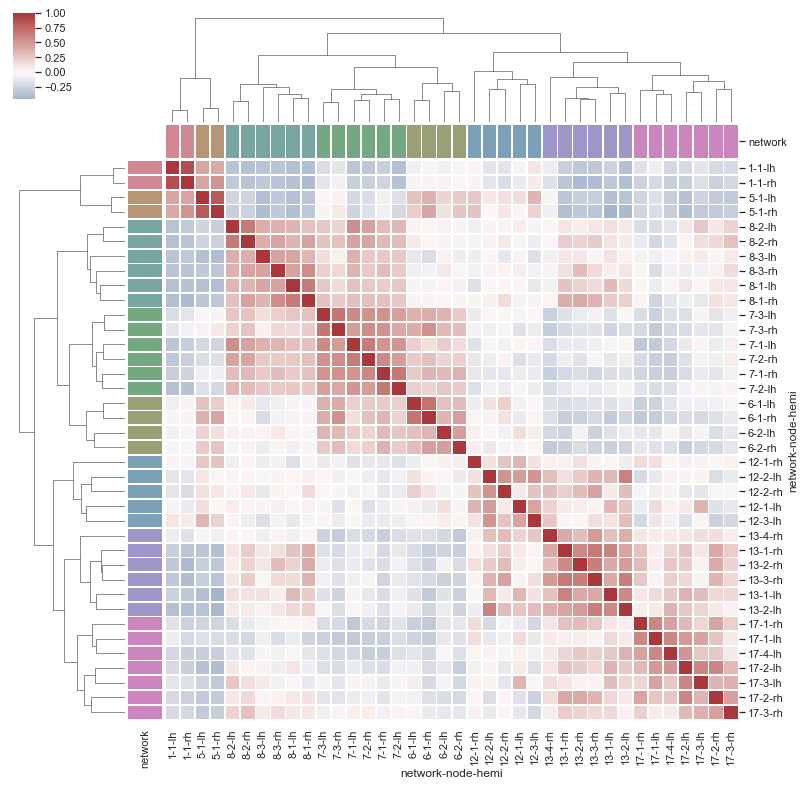

In [9]:
# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
              row_colors=network_colors, col_colors=network_colors,
              linewidths=.75, figsize=(13,13))

## Lineplot from a wide-form dataset

In [10]:
import numpy as np

In [11]:
sns.set(style="whitegrid")

In [12]:
rs = np.random.RandomState(365)

In [13]:
values = rs.randn(365, 4).cumsum(axis=0)

In [14]:
dates = pd.date_range("1 1 2016", periods=365, freq="D")

In [15]:
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

In [16]:
data = data.rolling(7).mean()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


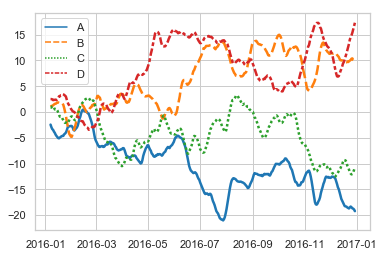

In [17]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## Dot plot with several variables

In [18]:
sns.set(style="whitegrid")

In [19]:
# Load the dataset
crashes = sns.load_dataset("car_crashes")

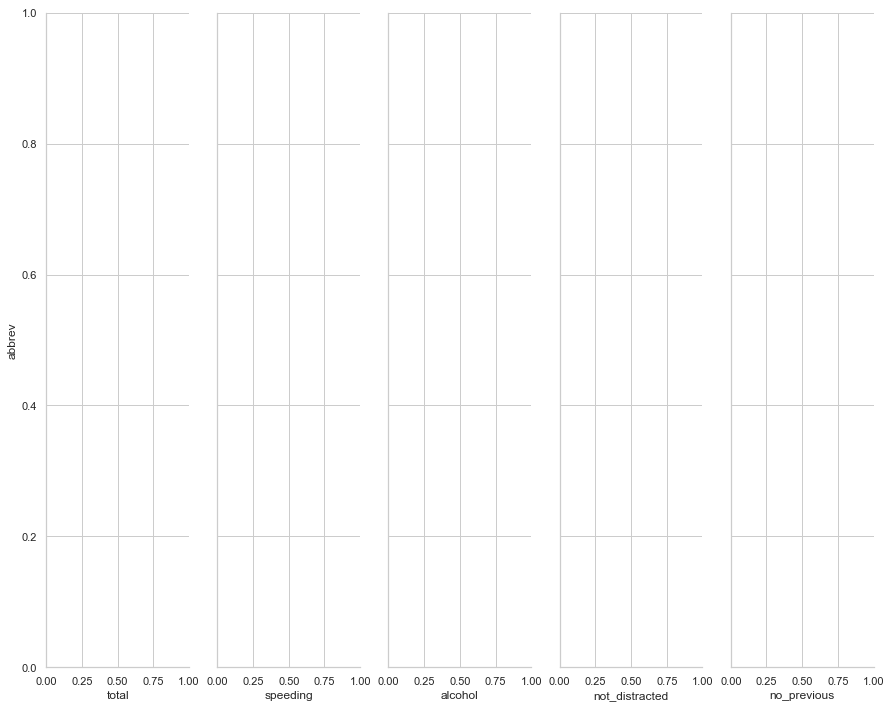

In [20]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                height=10, aspect=.25)

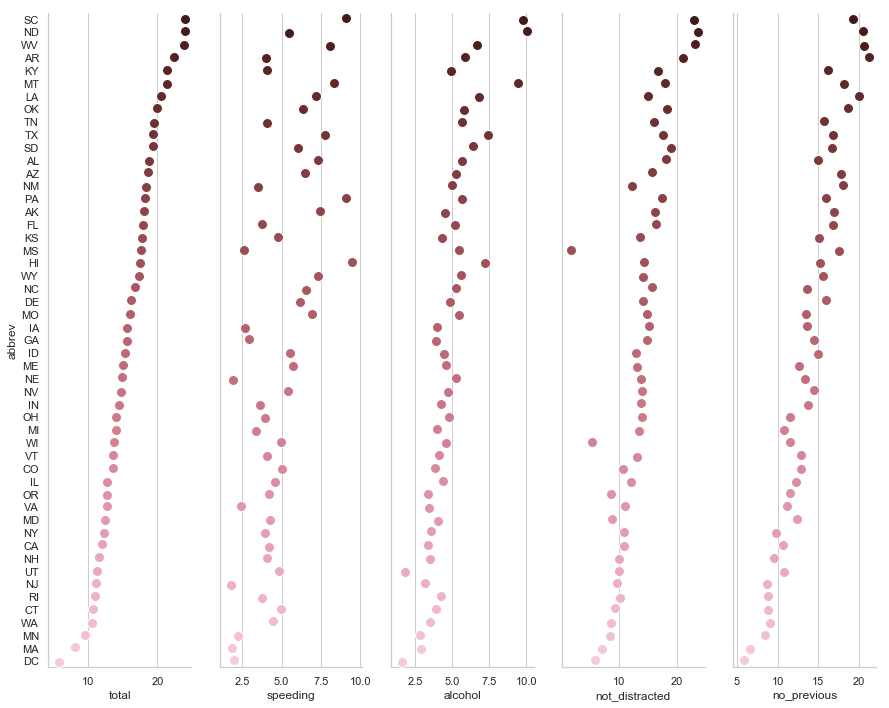

In [22]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
     palette="ch:s=1, r=-.1,h=1_r", linewidth=1, edgecolor="w")

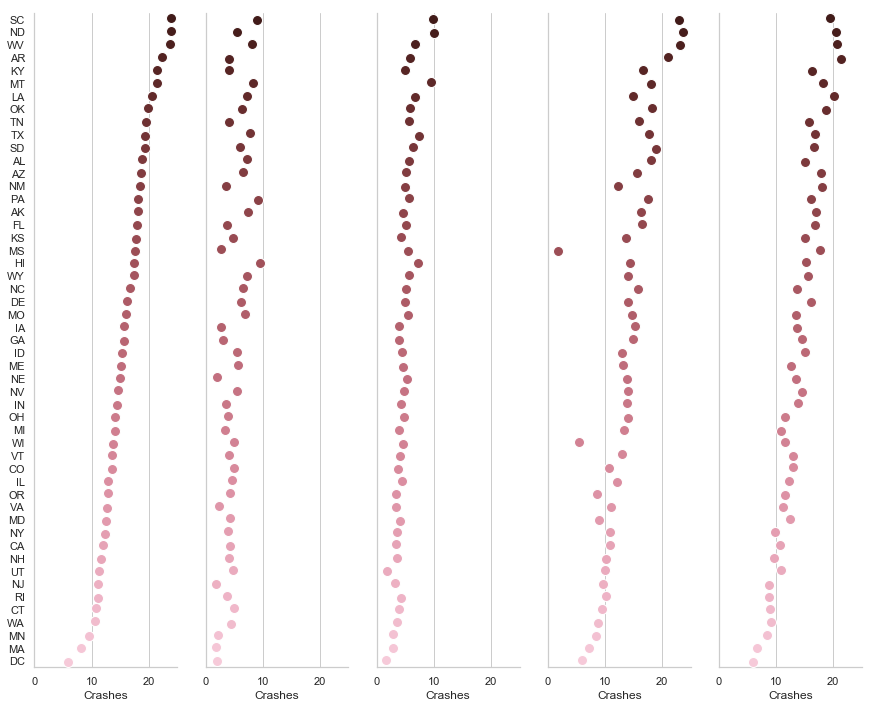

In [23]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
     palette="ch:s=1, r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

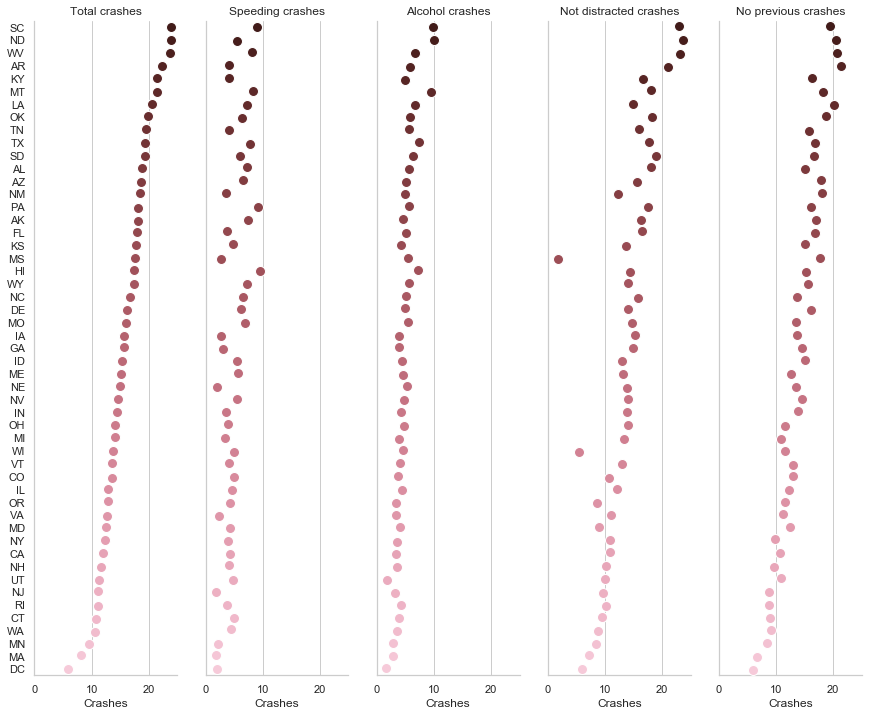

In [25]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
     palette="ch:s=1, r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
         "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):
    
    # Set a differen title for each axes
    ax.set(title=title)